References: 

- http://www.diva-portal.org/smash/get/diva2:1382324/FULLTEXT01.pdf
- https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.model_selection import train_test_split
from numpy import sqrt, array, random, argsort
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, centroid, fcluster
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import cdist, pdist
from sklearn.neighbors import NearestCentroid



#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
df =  pd.read_csv("https://raw.githubusercontent.com/AIML-Makgeolli/CpE-AIDL/main/thesis_database/Crop_recommendation.csv")
df_train = df.drop(['label','rainfall'], axis = 1)

Declarations

In [3]:
X_N= df_train[['N']]
X_P= df_train[['P']]
X_K= df_train[['K']]
X_temp= df_train[['temperature']]
X_moist= df_train[['humidity']]
y = df_train[['ph']]

Nitrogen and ph 

In [4]:
class hierarchical():
  def __init__(self):
    return

  def input_train(self, X_in, y_in):
    self.X = X_in
    self.y = y_in
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,test_size=0.3, random_state=42)
    self.data = pd.concat([X_train, y_train], axis=1).to_numpy()
    return self.data

  def dendograms(self):
    plt.figure(figsize=(7, 5))
    plt.title("Dendograms")
    dend = shc.dendrogram(shc.linkage(self.data, method='ward'))

  def cluster_fit(self, clust):
    self.cluster = AgglomerativeClustering(n_clusters = clust, affinity ='euclidean', linkage='ward')
    self.res = self.cluster.fit_predict(self.data)
    
    self.labels = self.cluster.labels_
    
    print(self.labels)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(self.data, self.labels))
    print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(self.data, self.labels))
    print("Davies-Bouldin Index: %0.3f" % metrics.davies_bouldin_score(self.data, self.labels))
    
    return self.res
  
  def outlier(self,threshold):
    clf = NearestCentroid()
    clf.fit(self.data, self.res)
    self.centroids = clf.centroids_
    self.points = np.empty((0,len(self.data[0])), float)
    self.distances = np.empty((0,len(self.data[0])), float)
    for i, center_elem in enumerate(self.centroids):
      self.distances = np.append(self.distances, cdist([center_elem],self.data[self.res == i], 'euclidean')) 
      self.points = np.append(self.points, self.data[self.res == i], axis=0)
      
    percentile = threshold
    self.outliers = self.points[np.where(self.distances > np.percentile(self.distances, percentile))]
    outliers_df = pd.DataFrame(self.outliers,columns =['X','y'])
    return outliers_df

  def cluster_graph(self):
    plt.figure(figsize=(7, 5))
    plt.scatter(self.data[:,0], self.data[:,1], c=self.cluster.labels_, cmap='rainbow')
    plt.scatter(*zip(*self.outliers),marker="o",facecolor="None",edgecolor="g",s=70); 
    plt.scatter(*zip(*self.centroids),marker="o",facecolor="b",edgecolor="b",s=20);


hierarchical_test = hierarchical()

Nitrogen and pH

In [5]:
hierarchical_test.input_train(X_N,y)

array([[21.        ,  5.69958697],
       [29.        ,  6.96741777],
       [60.        ,  5.72257982],
       ...,
       [11.        ,  6.47544932],
       [11.        ,  6.36114111],
       [32.        ,  7.00703752]])

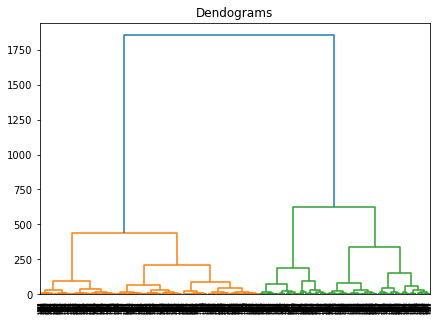

In [6]:
hierarchical_test.dendograms()

In [7]:
hierarchical_test.cluster_fit(3)

[0 0 1 ... 0 0 0]
Silhouette Coefficient: 0.628
Calinski-Harabasz Index: 6240.256
Davies-Bouldin Index: 0.526


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [8]:
hierarchical_test.outlier(80)

,X,y
0,39.0,5.004075
1,40.0,4.697751
2,43.0,7.806748
3,1.0,6.819827
4,40.0,5.735364
...,...,...
303,127.0,6.127940
304,134.0,7.994680
305,131.0,7.762648
306,129.0,6.732109


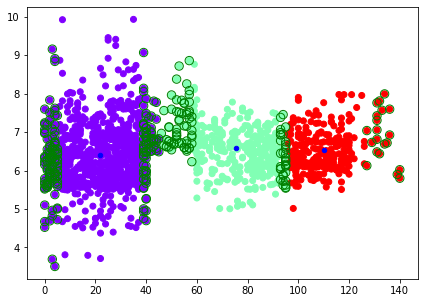

In [9]:
hierarchical_test.cluster_graph()

Phosphorus and pH

In [10]:
hierarchical_test.input_train(X_P,y)

array([[ 26.        ,   5.69958697],
       [ 35.        ,   6.96741777],
       [ 44.        ,   5.72257982],
       ...,
       [ 36.        ,   6.47544932],
       [124.        ,   6.36114111],
       [ 78.        ,   7.00703752]])

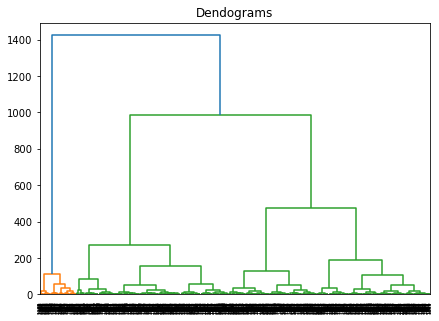

In [11]:
hierarchical_test.dendograms()

In [12]:
hierarchical_test.cluster_fit(3)

[0 0 0 ... 0 1 2]
Silhouette Coefficient: 0.607
Calinski-Harabasz Index: 5355.551
Davies-Bouldin Index: 0.433


array([0, 0, 0, ..., 0, 1, 2], dtype=int64)

In [13]:
hierarchical_test.outlier(80)

,X,y
0,44.0,5.722580
1,45.0,5.952385
2,51.0,7.196774
3,13.0,7.335158
4,9.0,5.956402
...,...,...
303,87.0,5.571401
304,91.0,6.275572
305,95.0,6.211833
306,86.0,5.644487


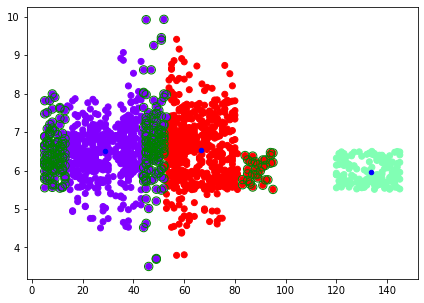

In [14]:
hierarchical_test.cluster_graph()

Potassium and pH

In [15]:
hierarchical_test.input_train(X_K,y)

array([[ 27.        ,   5.69958697],
       [ 28.        ,   6.96741777],
       [ 23.        ,   5.72257982],
       ...,
       [ 31.        ,   6.47544932],
       [204.        ,   6.36114111],
       [ 22.        ,   7.00703752]])

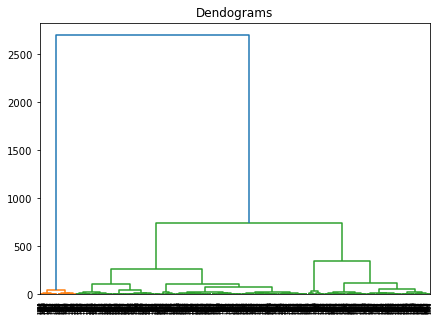

In [16]:
hierarchical_test.dendograms()

In [17]:
hierarchical_test.cluster_fit(3)

[2 2 2 ... 2 1 2]
Silhouette Coefficient: 0.672
Calinski-Harabasz Index: 24416.300
Davies-Bouldin Index: 0.353


array([2, 2, 2, ..., 2, 1, 2], dtype=int64)

In [18]:
hierarchical_test.outlier(80)

,X,y
0,75.0,7.064790
1,79.0,7.728998
2,81.0,6.138244
3,79.0,7.313122
4,79.0,7.806748
...,...,...
303,36.0,6.152907
304,35.0,6.235358
305,8.0,6.413548
306,35.0,6.784461


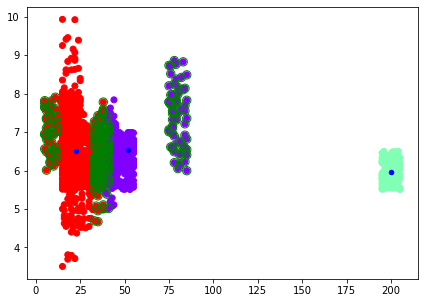

In [19]:
hierarchical_test.cluster_graph()

Temperature and pH

In [20]:
hierarchical_test.input_train(X_temp,y)

array([[27.00315545,  5.69958697],
       [28.3471611 ,  6.96741777],
       [24.7947077 ,  5.72257982],
       ...,
       [27.92063282,  6.47544932],
       [13.42988625,  6.36114111],
       [23.97081395,  7.00703752]])

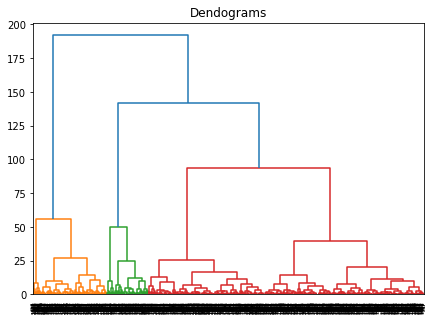

In [21]:
hierarchical_test.dendograms()

In [22]:
hierarchical_test.cluster_fit(3)

[0 0 0 ... 0 1 0]
Silhouette Coefficient: 0.501
Calinski-Harabasz Index: 1996.702
Davies-Bouldin Index: 0.582


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
hierarchical_test.outlier(80)

,X,y
0,23.004459,7.840207
1,22.126594,6.386021
2,21.774667,6.400720
3,21.801298,5.554824
4,30.949082,7.402892
...,...,...
303,30.721199,6.011302
304,43.302049,6.641099
305,38.589545,6.825665
306,30.793757,6.273398


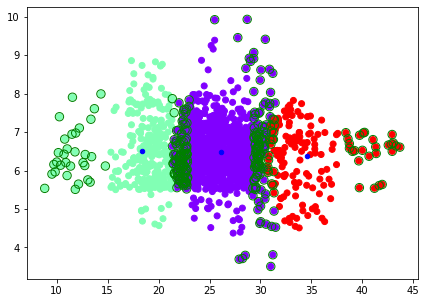

In [24]:
hierarchical_test.cluster_graph()

Moisture and pH

In [25]:
hierarchical_test.input_train(X_moist,y)

array([[47.67525434,  5.69958697],
       [53.53903102,  6.96741777],
       [70.04556743,  5.72257982],
       ...,
       [51.77965917,  6.47544932],
       [80.06633966,  6.36114111],
       [62.35557553,  7.00703752]])

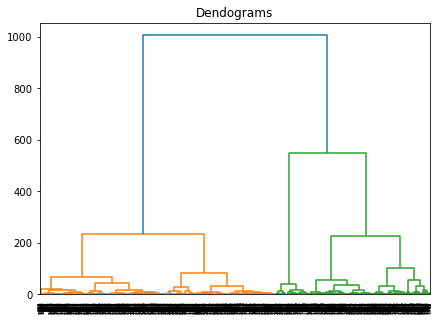

In [26]:
hierarchical_test.dendograms()

In [27]:
hierarchical_test.cluster_fit(3)

[1 1 1 ... 1 0 1]
Silhouette Coefficient: 0.695
Calinski-Harabasz Index: 6735.176
Davies-Bouldin Index: 0.386


array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [28]:
hierarchical_test.outlier(80)

,X,y
0,77.217056,6.207652
1,99.981876,5.735364
2,75.666533,6.205264
3,75.882986,6.021440
4,77.795868,5.631272
...,...,...
303,69.027623,5.773455
304,45.413936,5.956585
305,39.372526,4.747352
306,69.693664,6.596719


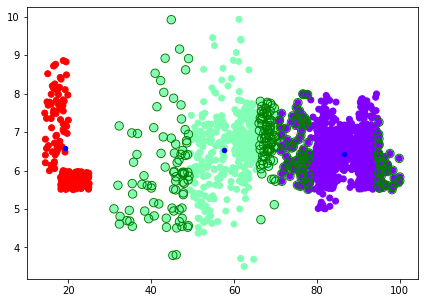

In [29]:
hierarchical_test.cluster_graph()